In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes
from numpy.linalg import eig, eigh

In [4]:
data , y = load_diabetes(return_X_y=True , as_frame=True)

In [5]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
# transform the data to mean centered
data = data - np.mean(data,axis=0)

In [10]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [11]:
# calculate the covariance matrix

In [66]:
data.cov()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,0.002268,0.000394,0.000420,0.000761,0.000590,0.000497,-0.000170,0.000462,0.000614,0.000684
sex,0.000394,0.002268,0.000200,0.000547,0.000080,0.000323,-0.000860,0.000753,0.000340,0.000472
bmi,0.000420,0.000200,0.002268,0.000897,0.000566,0.000592,-0.000832,0.000938,0.001012,0.000881
bp,0.000761,0.000547,0.000897,0.002268,0.000550,0.000421,-0.000405,0.000584,0.000892,0.000885
s1,0.000590,0.000080,0.000566,0.000550,0.002268,0.002033,0.000117,0.001229,0.001169,0.000739
s2,0.000497,0.000323,0.000592,0.000421,0.002033,0.002268,-0.000445,0.001496,0.000722,0.000659
s3,-0.000170,-0.000860,-0.000832,-0.000405,0.000117,-0.000445,0.002268,-0.001675,-0.000904,-0.000621
s4,0.000462,0.000753,0.000938,0.000584,0.001229,0.001496,-0.001675,0.002268,0.001401,0.000946
s5,0.000614,0.000340,0.001012,0.000892,0.001169,0.000722,-0.000904,0.001401,0.002268,0.001054
s6,0.000684,0.000472,0.000881,0.000885,0.000739,0.000659,-0.000621,0.000946,0.001054,0.002268


In [45]:
np.cov(data.T).shape

(10, 10)

In [46]:
data_cov = np.cov(data.T)
# data_cov = data.cov()

In [47]:
data_cov.shape

(10, 10)

In [48]:
eigen_values , eigen_vectors = np.linalg.eigh(data_cov)

In [49]:
eigen_values

array([1.94120858e-05, 1.77596427e-04, 9.83405978e-04, 1.21670216e-03,
       1.36670539e-03, 1.50154510e-03, 2.16661316e-03, 2.73461737e-03,
       3.38394485e-03, 9.12519444e-03])

In [50]:
np.sort(eigen_values)

array([1.94120858e-05, 1.77596427e-04, 9.83405978e-04, 1.21670216e-03,
       1.36670539e-03, 1.50154510e-03, 2.16661316e-03, 2.73461737e-03,
       3.38394485e-03, 9.12519444e-03])

In [51]:
# sort the eigen values

In [52]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [53]:
sorted_eigenvectors

array([[-0.2164309 , -0.04436721, -0.49466786,  0.41401222, -0.68687555,
        -0.22581534,  0.10953009,  0.01493711, -0.00809995, -0.00326253],
       [-0.18696688,  0.3865472 ,  0.10686424,  0.67985981,  0.37346404,
         0.04170542,  0.06762221,  0.4429334 ,  0.00210574, -0.00366045],
       [-0.30316216,  0.15628128, -0.16752691, -0.49982463,  0.12933269,
        -0.40315117,  0.51987438,  0.39292228, -0.04237706, -0.00824737],
       [-0.27173773,  0.138266  , -0.51357084,  0.01966246,  0.48687441,
        -0.27278327, -0.32065478, -0.47736014, -0.02719409,  0.00322226],
       [-0.34325511, -0.57302691,  0.0685791 ,  0.068396  ,  0.12917992,
         0.00539819, -0.07364356,  0.12941089,  0.04203762, -0.70977509],
       [-0.35186068, -0.45594185,  0.26968897,  0.16777391,  0.11672218,
        -0.13326155,  0.2305345 , -0.191325  ,  0.35931639,  0.56319488],
       [ 0.28243681, -0.50623907, -0.38603191,  0.07602044,  0.24500101,
         0.10635402,  0.00754795,  0.32463516

In [54]:
data.shape

(442, 10)

In [55]:
num_components = 3
eigenvector_subset = sorted_eigenvectors[:,0:num_components]

In [57]:
eigenvector_subset[9]

array([-0.32218296,  0.08494884, -0.2768422 ])

In [58]:
data.shape

(442, 10)

In [59]:
eigenvector_subset.shape

(10, 3)

In [63]:
X_reduced = np.dot(data ,eigenvector_subset  )

In [64]:
X_reduced

array([[-0.02793021,  0.09260136, -0.02802565],
       [ 0.13468668, -0.06526327, -0.00132849],
       [-0.01294384,  0.07776432, -0.03516224],
       ...,
       [ 0.00976067,  0.05733918, -0.02360117],
       [-0.03295652, -0.00999473,  0.04132099],
       [ 0.09056122, -0.18910841,  0.0022992 ]])

In [65]:
pd.DataFrame(X_reduced , columns= ['Pc1','Pc2','Pc3'])

,Pc1,Pc2,Pc3
0,-0.027930,0.092601,-0.028026
1,0.134687,-0.065263,-0.001328
2,-0.012944,0.077764,-0.035162
3,-0.002344,-0.018183,0.095750
4,0.035979,-0.038621,0.002723
...,...,...,...
437,-0.058958,0.049276,-0.044173
438,-0.060157,-0.036212,0.083248
439,0.009761,0.057339,-0.023601
440,-0.032957,-0.009995,0.041321


# Use PCA module to transform the data

In [67]:
pca =  PCA(n_components=3)

In [68]:
pca.fit_transform(data)

array([[ 0.02793021, -0.09260136,  0.02802565],
       [-0.13468668,  0.06526327,  0.00132849],
       [ 0.01294384, -0.07776432,  0.03516224],
       ...,
       [-0.00976067, -0.05733918,  0.02360117],
       [ 0.03295652,  0.00999473, -0.04132099],
       [-0.09056122,  0.18910841, -0.0022992 ]])

In [69]:
X_reduced

array([[-0.02793021,  0.09260136, -0.02802565],
       [ 0.13468668, -0.06526327, -0.00132849],
       [-0.01294384,  0.07776432, -0.03516224],
       ...,
       [ 0.00976067,  0.05733918, -0.02360117],
       [-0.03295652, -0.00999473,  0.04132099],
       [ 0.09056122, -0.18910841,  0.0022992 ]])

In [70]:
pca.explained_variance_ratio_

array([0.40242108, 0.14923197, 0.12059663])

In [71]:
sum(pca.explained_variance_ratio_)

0.6722496686876479

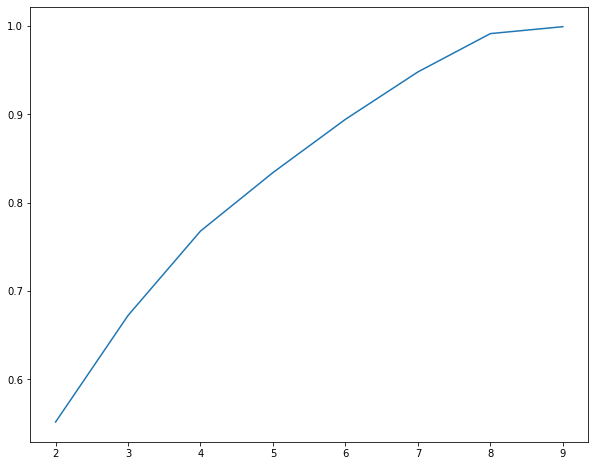

In [76]:
plt.figure(figsize=(10,8))
exp_ratio =[]
for i in range(2,10):
    pca =  PCA(n_components=i)
    pca.fit_transform(data)
    exp_ratio.append(sum(pca.explained_variance_ratio_))
plt.plot(range(2,10) , exp_ratio)

In [77]:
pca = PCA(n_components=7)
pca.fit_transform(data)

array([[ 0.02793021, -0.09260136,  0.02802565, ..., -0.01220903,
        -0.04809836, -0.00855431],
       [-0.13468668,  0.06526327,  0.00132849, ..., -0.00681463,
        -0.04818423,  0.0106735 ],
       [ 0.01294384, -0.07776432,  0.03516224, ..., -0.05535967,
        -0.05292872, -0.02199658],
       ...,
       [-0.00976067, -0.05733918,  0.02360117, ..., -0.00673399,
        -0.00215714, -0.03022272],
       [ 0.03295652,  0.00999473, -0.04132099, ...,  0.00568996,
        -0.02648935,  0.02595636],
       [-0.09056122,  0.18910841, -0.0022992 , ...,  0.02853671,
         0.07834195,  0.01166342]])

In [78]:
sum(pca.explained_variance_ratio_)

0.9479437209346274

In [80]:
pca = PCA(n_components=6)
data_trans = pca.fit_transform(data)
sum(pca.explained_variance_ratio_)

0.8942871557026896

In [101]:
df =pd.DataFrame(data_trans , columns= ['Pc'+str(i) for i in range(len(data_trans[0]))])

In [85]:
len(data_trans[0])

6

In [90]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

C:\Users\jiten\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jiten\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jiten\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jiten\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

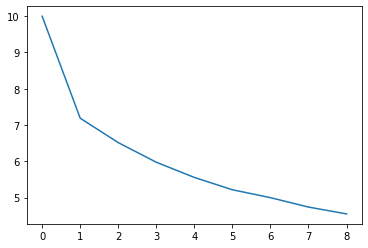

In [89]:
wcss = []
for i in range(1,10):
    k_mean = KMeans(n_clusters=i).fit(data)
    wcss.append(k_mean.inertia_)
plt.plot(wcss)

In [95]:
k_mean = KMeans(n_clusters=3).fit(data)
k_mean.labels_

C:\Users\jiten\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jiten\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [96]:
silhouette_score(data , k_mean.labels_
                )

0.15322256833618436

In [104]:
dbs = DBSCAN(eps =0.7 , min_samples= 5)
dbs.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,